#**Brain Tumor MRI Image Dataset**

## Integrantes: 

### Juan Diego Calderon Carrillo - 2170089
### Daniel Alejandro León Tarazona - 2180044
### Camilo Quezada Sanchez - 2181580

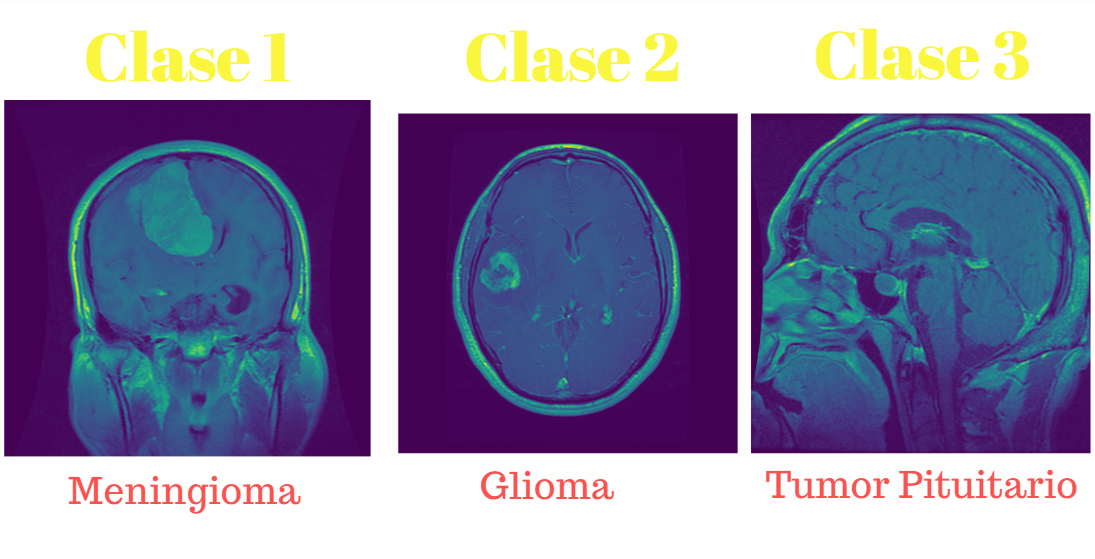

###Este conjunto de datos de tumores cerebrales contiene 3064 imágenes de 233 pacientes con tres tipos de tumores cerebrales: Meningioma (Clase 1, 708 Imagenes), Glioma (1426 Imagenes) y Tumor Pituitario (930 Imagenes).

# **Montar drive y cargar dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "drive/My Drive/Proyecto MRI/dataset/MRI.zip"

Archive:  drive/My Drive/Proyecto MRI/dataset/MRI.zip
   creating: MRI/1/
  inflating: MRI/1/2300.png          
  inflating: MRI/1/2301.png          
  inflating: MRI/1/2302.png          
  inflating: MRI/1/2303.png          
  inflating: MRI/1/2304.png          
  inflating: MRI/1/2305.png          
  inflating: MRI/1/2306.png          
  inflating: MRI/1/2307.png          
  inflating: MRI/1/2308.png          
  inflating: MRI/1/2309.png          
  inflating: MRI/1/2310.png          
  inflating: MRI/1/2311.png          
  inflating: MRI/1/2312.png          
  inflating: MRI/1/2313.png          
  inflating: MRI/1/2314.png          
  inflating: MRI/1/2315.png          
  inflating: MRI/1/2316.png          
  inflating: MRI/1/2317.png          
  inflating: MRI/1/2318.png          
  inflating: MRI/1/2319.png          
  inflating: MRI/1/2320.png          
  inflating: MRI/1/2321.png          
  inflating: MRI/1/2322.png          
  inflating: MRI/1/2323.png          
  inflating: M

Image1.png

In [ ]:
#@title **Librerias**
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, roc_auc_score

# **Dividir datos 80% Train 20% Test**


In [ ]:
class_1 = os.listdir("/content/MRI/1")
train_1, test_1 = train_test_split(class_1, test_size=0.2)

print("Imagenes clase 1: " + str(np.shape(class_1)[0]))
print("Train clase 1: " + str(np.shape(train_1)[0]))
print("Test clase 1: " + str(np.shape(test_1)[0]))

class_2 = os.listdir("/content/MRI/2")
train_2, test_2 = train_test_split(class_2, test_size=0.2)

print("")
print("Imagenes clase 2: " + str(np.shape(class_2)[0]))
print("Train clase 2: " + str(np.shape(train_2)[0]))
print("Test clase 2: " + str(np.shape(test_2)[0]))

class_3 = os.listdir("/content/MRI/3")
train_3, test_3 = train_test_split(class_3, test_size=0.2)

print("")
print("Imagenes clase 3: " + str(np.shape(class_3)[0]))
print("Train clase 3: " + str(np.shape(train_3)[0]))
print("Test clase 3: " + str(np.shape(test_3)[0]))

Imagenes clase 1: 708
Train clase 1: 566
Test clase 1: 142

Imagenes clase 2: 1426
Train clase 2: 1140
Test clase 2: 286

Imagenes clase 3: 930
Train clase 3: 744
Test clase 3: 186


# **Creacion de Directorios**

In [ ]:
#Creacion de Directorios Train, Validacion y Test y directorios para cada clase

base_dir = "auto_split"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "Train")
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, "Test")
os.mkdir(test_dir)

labels = ["1","2","3"]

for label in labels:
    label_path_train = os.path.join(train_dir, label)
    os.mkdir(label_path_train)
    label_path_test = os.path.join(test_dir, label)
    os.mkdir(label_path_test)

# **Guardado de Imagenes**

In [ ]:
#Guardamos las imagenes en los Directorios creados anteriormente

image_dir = "/content/MRI"

for i in train_1:
    src_dir = os.path.join(image_dir,"1", str(i))
    dst_dir = os.path.join(train_dir, "1", str(i))
    shutil.copyfile(src_dir, dst_dir)

for i in train_2:
    src_dir = os.path.join(image_dir,"2",str(i))
    dst_dir = os.path.join(train_dir, "2", str(i))
    shutil.copyfile(src_dir, dst_dir)

for i in train_3:
    src_dir = os.path.join(image_dir,"3", str(i))
    dst_dir = os.path.join(train_dir, "3", str(i))
    shutil.copyfile(src_dir, dst_dir)
    
for i in test_1:
    src_dir = os.path.join(image_dir,"1", str(i))
    dst_dir = os.path.join(test_dir, "1", str(i))
    shutil.copyfile(src_dir, dst_dir)

for i in test_2:
    src_dir = os.path.join(image_dir,"2", str(i))
    dst_dir = os.path.join(test_dir, "2", str(i))
    shutil.copyfile(src_dir, dst_dir)

for i in test_3:
    src_dir = os.path.join(image_dir,"3", str(i))
    dst_dir = os.path.join(test_dir, "3", str(i))
    shutil.copyfile(src_dir, dst_dir)

In [ ]:
#Se confirma que se guardaron el numero total de imagenes correctamente

train_1 = np.shape(os.listdir("/content/auto_split/Train/1"))[0]
train_2 = np.shape(os.listdir("/content/auto_split/Train/2"))[0]
train_3 = np.shape(os.listdir("/content/auto_split/Train/3"))[0]
train_total = train_1 + train_2 + train_3

test_1 = np.shape(os.listdir("/content/auto_split/Test/1"))[0]
test_2 = np.shape(os.listdir("/content/auto_split/Test/2"))[0]
test_3 = np.shape(os.listdir("/content/auto_split/Test/3"))[0]
test_total = test_1 + test_2 + test_3

print("Total train class 1 images: " + str(train_1))
print("Total train class 2 images: " + str(train_2))
print("Total train class 3 images: " + str(train_3))
print("")
print("Total test class 1 images: " + str(test_1))
print("Total test class 2 images: " + str(test_2))
print("Total test class 3 images: " + str(test_3))
print("")
print("Total train images: " + str(train_total))
print("Total test images: " + str(test_total))
print("")
print("Total images: " + str(train_total + test_total))

Total train class 1 images: 566
Total train class 2 images: 1140
Total train class 3 images: 744

Total test class 1 images: 142
Total test class 2 images: 286
Total test class 3 images: 186

Total train images: 2450
Total test images: 614

Total images: 3064


# **Dividir datos para los clasificadores**

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

flat_data_arr=[]
target_arr=[]

datadir='/content/MRI' 

for i in range(1,4):
  path=os.path.join(datadir,str(i))
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(256,256,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(i-1)

flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

df=pd.DataFrame(flat_data) 
df['Target']=target
x=df.iloc[:,:-1] 
y=df.iloc[:,-1] 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

# **Naive Gaussian Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

est_gaussian = GaussianNB()

est_gaussian.fit(x_train,y_train)
predictions = est_gaussian.predict(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.model_selection import KFold

est_gaussian = GaussianNB()
est_gaussian.fit(x_train,y_train)

test_acc = cross_val_score(est_gaussian, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
test_precision_score = cross_val_score(est_gaussian, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(precision_score, average="weighted"))
test_f1_score = cross_val_score(est_gaussian, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(f1_score, average="weighted"))
test_recall_score = cross_val_score(est_gaussian, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(recall_score, average="weighted"))

print ("Test accuracy: %.4f (+/- %.5f)"%(np.mean(test_acc), np.std(test_acc)))
print ("Test precision: %.4f (+/- %.5f)"%(np.mean(test_precision_score), np.std(test_precision_score)))
print ("Test F1 score: %.4f (+/- %.5f)"%(np.mean(test_f1_score), np.std(test_f1_score)))
print ("Test Recall score: %.4f (+/- %.5f)"%(np.mean(test_recall_score), np.std(test_recall_score)))

Test accuracy: 0.7163 (+/- 0.08762)
Test precision: 0.7169 (+/- 0.06873)
Test F1 score: 0.6968 (+/- 0.04560)
Test Recall score: 0.7209 (+/- 0.05629)


In [ ]:
#@title **Matriz de Confusión**

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

predictions = est_gaussian.predict(x_test)
labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

est_dtc = DecisionTreeClassifier()
est_dtc.fit(x_train,y_train)

test_acc = cross_val_score(est_dtc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
test_precision_score = cross_val_score(est_dtc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(precision_score, average="weighted"))
test_f1_score = cross_val_score(est_dtc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(f1_score, average="weighted"))
test_recall_score = cross_val_score(est_dtc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(recall_score, average="weighted"))

print ("Test accuracy: %.4f (+/- %.5f)"%(np.mean(test_acc), np.std(test_acc)))
print ("Test precision: %.4f (+/- %.5f)"%(np.mean(test_precision_score), np.std(test_precision_score)))
print ("Test F1 score: %.4f (+/- %.5f)"%(np.mean(test_f1_score), np.std(test_f1_score)))
print ("Test Recall score: %.4f (+/- %.5f)"%(np.mean(test_recall_score), np.std(test_recall_score)))

Test accuracy: 0.7588 (+/- 0.06373)
Test precision: 0.7857 (+/- 0.04249)
Test F1 score: 0.7488 (+/- 0.02751)
Test Recall score: 0.7422 (+/- 0.04066)


In [ ]:
#@title **Matriz de Confusión**

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

predictions = est_dtc.predict(x_test)
labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

est_rf = RandomForestClassifier()
est_rf.fit(x_train,y_train)

test_acc = cross_val_score(est_rf, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
test_precision_score = cross_val_score(est_rf, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(precision_score, average="weighted"))
test_f1_score = cross_val_score(est_rf, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(f1_score, average="weighted"))
test_recall_score = cross_val_score(est_rf, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(recall_score, average="weighted"))

print ("Test accuracy: %.4f (+/- %.5f)"%(np.mean(test_acc), np.std(test_acc)))
print ("Test precision: %.4f (+/- %.5f)"%(np.mean(test_precision_score), np.std(test_precision_score)))
print ("Test F1 score: %.4f (+/- %.5f)"%(np.mean(test_f1_score), np.std(test_f1_score)))
print ("Test Recall score: %.4f (+/- %.5f)"%(np.mean(test_recall_score), np.std(test_recall_score)))

Test accuracy: 0.8744 (+/- 0.04282)
Test precision: 0.8634 (+/- 0.04647)
Test F1 score: 0.8637 (+/- 0.04524)
Test Recall score: 0.8759 (+/- 0.02780)


In [ ]:
#@title **Matriz de Confusión**

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

predictions = est_rf.predict(x_test)
labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

est_svc = SVC()
est_svc.fit(x_train,y_train)

test_acc = cross_val_score(est_svc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
test_precision_score = cross_val_score(est_svc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(precision_score, average="weighted"))
test_f1_score = cross_val_score(est_svc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(f1_score, average="weighted"))
test_recall_score = cross_val_score(est_svc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(recall_score, average="weighted"))

print ("Test accuracy: %.4f (+/- %.5f)"%(np.mean(test_acc), np.std(test_acc)))
print ("Test precision: %.4f (+/- %.5f)"%(np.mean(test_precision_score), np.std(test_precision_score)))
print ("Test F1 score: %.4f (+/- %.5f)"%(np.mean(test_f1_score), np.std(test_f1_score)))
print ("Test Recall score: %.4f (+/- %.5f)"%(np.mean(test_recall_score), np.std(test_recall_score)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

Test accuracy: 0.6754 (+/- 0.08459)
Test precision: 0.5348 (+/- 0.10362)
Test F1 score: 0.5876 (+/- 0.09029)
Test Recall score: 0.6751 (+/- 0.06720)


In [ ]:
#@title **Matriz de Confusión**

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

predictions = est_svc.predict(x_test)
labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()

# **RED NEURONAL**

ResNet50.png

##Ganó el concurso: ImageNet Large Scale Visual Recognition Challenge 2015 (ILSVRC2015). 

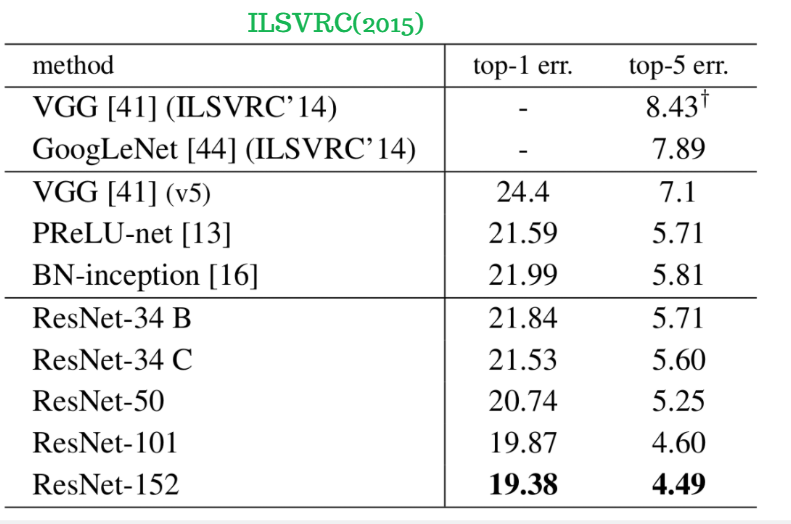

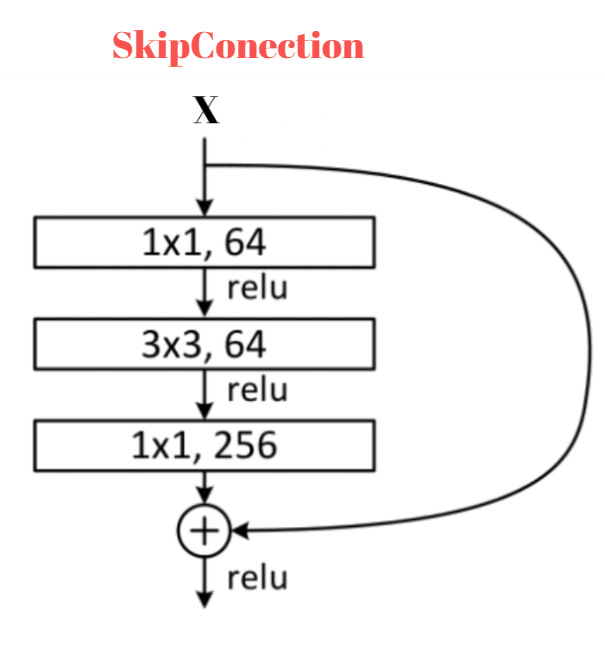

In [ ]:
#ResNet50

resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(256,256,3), classes=3, pooling='max') 

resnet.trainable = True
set_trainable = False

#Fine tunning
for layer in resnet.layers:
  if layer.name == 'conv4_block3_1_conv':
    set_trainable = True
  if set_trainable: 
    layer.trainable = True
  else:
    layer.trainable = False

resnet.summary()

94781440/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
#PLANTEAMIENTO DEL MODELO SECUENCIAL Y ADICIÓN DE LAS ÚLTIMAS CAPAS DE SALIDA
model = Sequential()
model.add(resnet)
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(3, activation="softmax")) #FUNCIÓN DE ACTIVACIÓN SOFTMAX, OUTPUT 3 CLASES 

model.compile(Adam(0.001, decay=0.001/20), loss="categorical_crossentropy", metrics=[categorical_accuracy])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1

In [ ]:
#CARGAR LOS DATOS
train_dir='/content/auto_split/Train'
test_dir='/content/auto_split/Test'

IMAGE_SHAPE = (256, 256, 3)
batch_size = 32

data_generator = ImageDataGenerator()

train_flow_param = {
    "directory": train_dir,
    "batch_size": batch_size,
    "target_size": IMAGE_SHAPE[:2],
}
train_flow = data_generator.flow_from_directory(**train_flow_param)

test_flow_param = {
    "directory": test_dir,
    "target_size": IMAGE_SHAPE[:2],
    "batch_size" : 1,
    "shuffle": False 
}
test_flow = data_generator.flow_from_directory(**test_flow_param)

Found 2450 images belonging to 3 classes.
Found 614 images belonging to 3 classes.


In [ ]:
#PARAMETROS PARA EL ENTRENAMIENTO

filepath = "model.h5"

checkpoint_param = {
    "filepath": filepath,
    "monitor": "categorical_accuracy",
    "verbose": 1,
    "save_best_only": True,
    "mode": "max"
}
checkpoint = ModelCheckpoint(**checkpoint_param)

lr_decay_params = {
    "monitor": "loss",
    "factor": 0.5,
    "patience": 3,
    "min_lr": 1e-5,
    "verbose":1
}
lr_decay = ReduceLROnPlateau(**lr_decay_params)

In [ ]:
#ENTRENAMIENTO

fit_params = {
    "generator": train_flow,
    "steps_per_epoch": train_flow.n // batch_size,
    "epochs": 20,
    "verbose": 1,
    "callbacks": [checkpoint, lr_decay]
}

history = model.fit_generator(**fit_params)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
76/76 [==============================] - 84s 623ms/step - loss: 0.4022 - categorical_accuracy: 0.8586

Epoch 00001: categorical_accuracy improved from -inf to 0.85856, saving model to model.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
76/76 [==============================] - 43s 555ms/step - loss: 0.1320 - categorical_accuracy: 0.9529

Epoch 00002: categorical_accuracy improved from 0.85856 to 0.95285, saving model to model.h5
Epoch 3/20
76/76 [==============================] - 42s 551ms/step - loss: 0.0958 - categorical_accuracy: 0.9640

Epoch 00003: categorical_accuracy improved from 0.95285 to 0.96402, saving model to model.h5
Epoch 4/20
76/76 [==============================] - 42s 552ms/step - loss: 0.1014 - categorical_accuracy: 0.9636

Epoch 00004: categorical_accuracy did not improve from 0.96402
Epoch 5/20
76/76 [==============================] - 42s 552ms/step - loss: 0.0783 - categorical_accuracy: 0.9723

Epoch 00005: categorical_accuracy improved from 0.96402 to 0.97229, saving model to model.h5
Epoch 6/20
76/76 [==============================] - 42s 553ms/step - loss: 0.0329 - categorical_accuracy: 0.9880

Epoch 00006: categorical_accuracy improved from 0.97229 to 0.98801, saving model to mode

In [ ]:
#Evaluar el modelo con distintas metricas para el test

y_test_true = test_flow.classes
y_test_pred = np.argmax(model.predict_generator(test_flow, steps=len(test_flow)), axis=1)

_, test_acc = model.evaluate_generator(test_flow, steps=len(test_flow))
test_precision_score = precision_score(y_test_true, y_test_pred, average="weighted")
test_f1_score = f1_score(y_test_true, y_test_pred, average="weighted")
test_recall_score = recall_score(y_test_true, y_test_pred, average='weighted')

print("Test accuracy: {:.4f}".format(test_acc))
print("Test Precision: {:.4f}".format(test_precision_score))
print("Test F1 score: {:.4f}".format(test_f1_score))
print("Test Recall score: {:.4f}".format(test_recall_score))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test accuracy: 0.9821
Test Precision: 0.9823
Test F1 score: 0.9821
Test Recall score: 0.9821


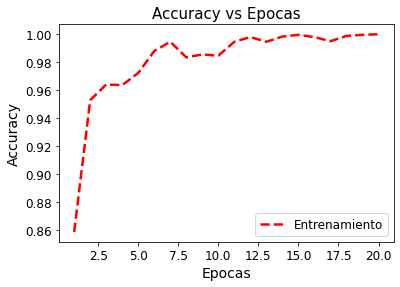

In [ ]:
#Grafica Accuracy vs Epocas

import matplotlib.pyplot as plt
import numpy as np
from pylab import *

epocas = np.arange(1, 21)
plt.plot(epocas, history.history["categorical_accuracy"], label='Entrenamiento',color="red", linestyle="--",linewidth=2.5)
#plt.plot(epocas, history.history["val_categorical_accuracy"], label='Validacion',color="blue",linestyle="-", linewidth=2.5)

xticks(fontsize=12)
yticks(fontsize=12)
plt.xlabel('Epocas',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)

plt.title("Accuracy vs Epocas",fontsize=15)

plt.legend(fontsize=12, loc="lower right")
plt.show()

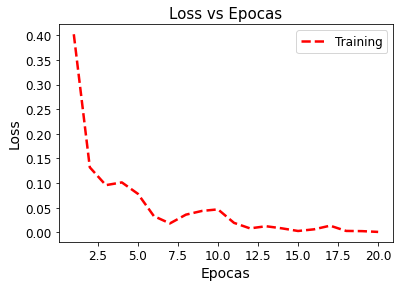

In [ ]:
#Grafica Loss vs Epocas

plt.plot(epocas, history.history["loss"], label='Training',color="red", linestyle="--",linewidth=2.5)
#plt.plot(epocas, history.history["val_loss"], label='Validation',color="blue",linestyle="-", linewidth=2.5)

xticks(fontsize=12)
yticks(fontsize=12)
plt.xlabel('Epocas',fontsize=14)
plt.ylabel('Loss',fontsize=14)

plt.title("Loss vs Epocas",fontsize=15)

plt.legend(fontsize=12)
plt.show()

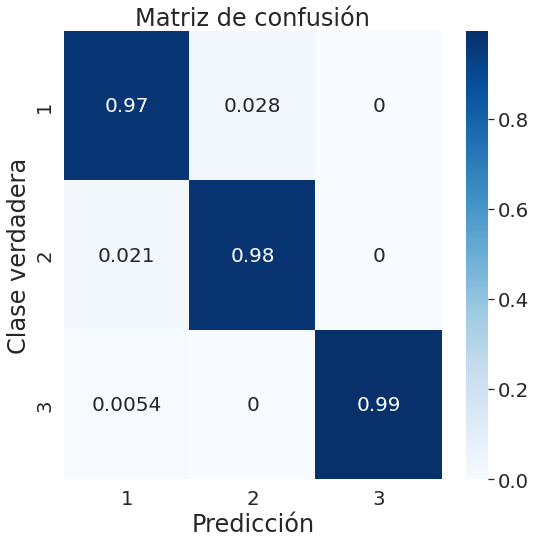

In [ ]:
#Matriz de Confusión

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test_true, y_test_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()